In [ ]:
#!unzip -uq "/content/drive/My Drive/data_xray.zip" -d "/content/drive/My Drive/data_xray"

In [ ]:
#!unzip -uq "/content/drive/My Drive/test.zip" -d "/content/drive/My Drive/test"

In [15]:
data_path = '/content/drive/My Drive/data_xray/data_xray/train'
test_path = '/content/drive/My Drive/test/test'

In [58]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image, display
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,Activation
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [17]:
def getLabel(path, label, x, y):
  for filename in os.listdir(path):
    # Spliting file names and storing the labels for image in list
    img = cv2.imread(os.path.join(path,filename))
    y.append(label)
     # Resize all images to a specific shape
    img = cv2.resize(img,shape)
    x.append(img)

In [18]:
  
path_healthy = '/content/drive/My Drive/data_xray/data_xray/train/healthy'
path_pneumonia = '/content/drive/My Drive/data_xray/data_xray/train/pneumonia'
path_tb = '/content/drive/My Drive/data_xray/data_xray/train/tb'
path_list = [path_healthy, path_pneumonia, path_tb]
label_list = ['healthy', 'pneumonia', 'tb']



In [19]:
test_healthy = '/content/drive/My Drive/test/test/healthy'
test_pneumonia = '/content/drive/My Drive/test/test/pneumonia'
test_tb = '/content/drive/My Drive/test/test/tb'
test_list = [test_healthy, test_pneumonia, test_tb]
labels_test = ['healthy', 'pneumonia', 'tb']

In [20]:
train_images = []       
train_labels = []
test_images = []       
test_labels = []
shape = (256,256)

In [22]:
for i,j in zip(path_list, label_list):
  getLabel(i,j,train_images,train_labels)

In [23]:
len(train_images)

1000

In [24]:
for i,j in zip(test_list, labels_test):
  getLabel(i,j, test_images, test_labels)

In [25]:
len(test_images)

62

In [26]:
train_labels = pd.get_dummies(train_labels).values
test_labels = pd.get_dummies(test_labels).values

In [27]:
print(train_labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [28]:
train_images = np.array(train_images)
test_images = np.array(test_images)


In [52]:
train_images = train_images /255.0
test_images = test_images/255.0

In [53]:
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,random_state=42)

In [54]:
x_train.shape

(750, 256, 256, 3)

In [31]:
x_val.shape

(250, 256, 256, 3)

In [32]:
y_train.shape

(750, 3)

healthy


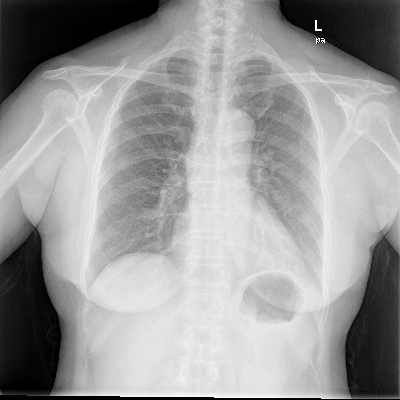

pneumonia


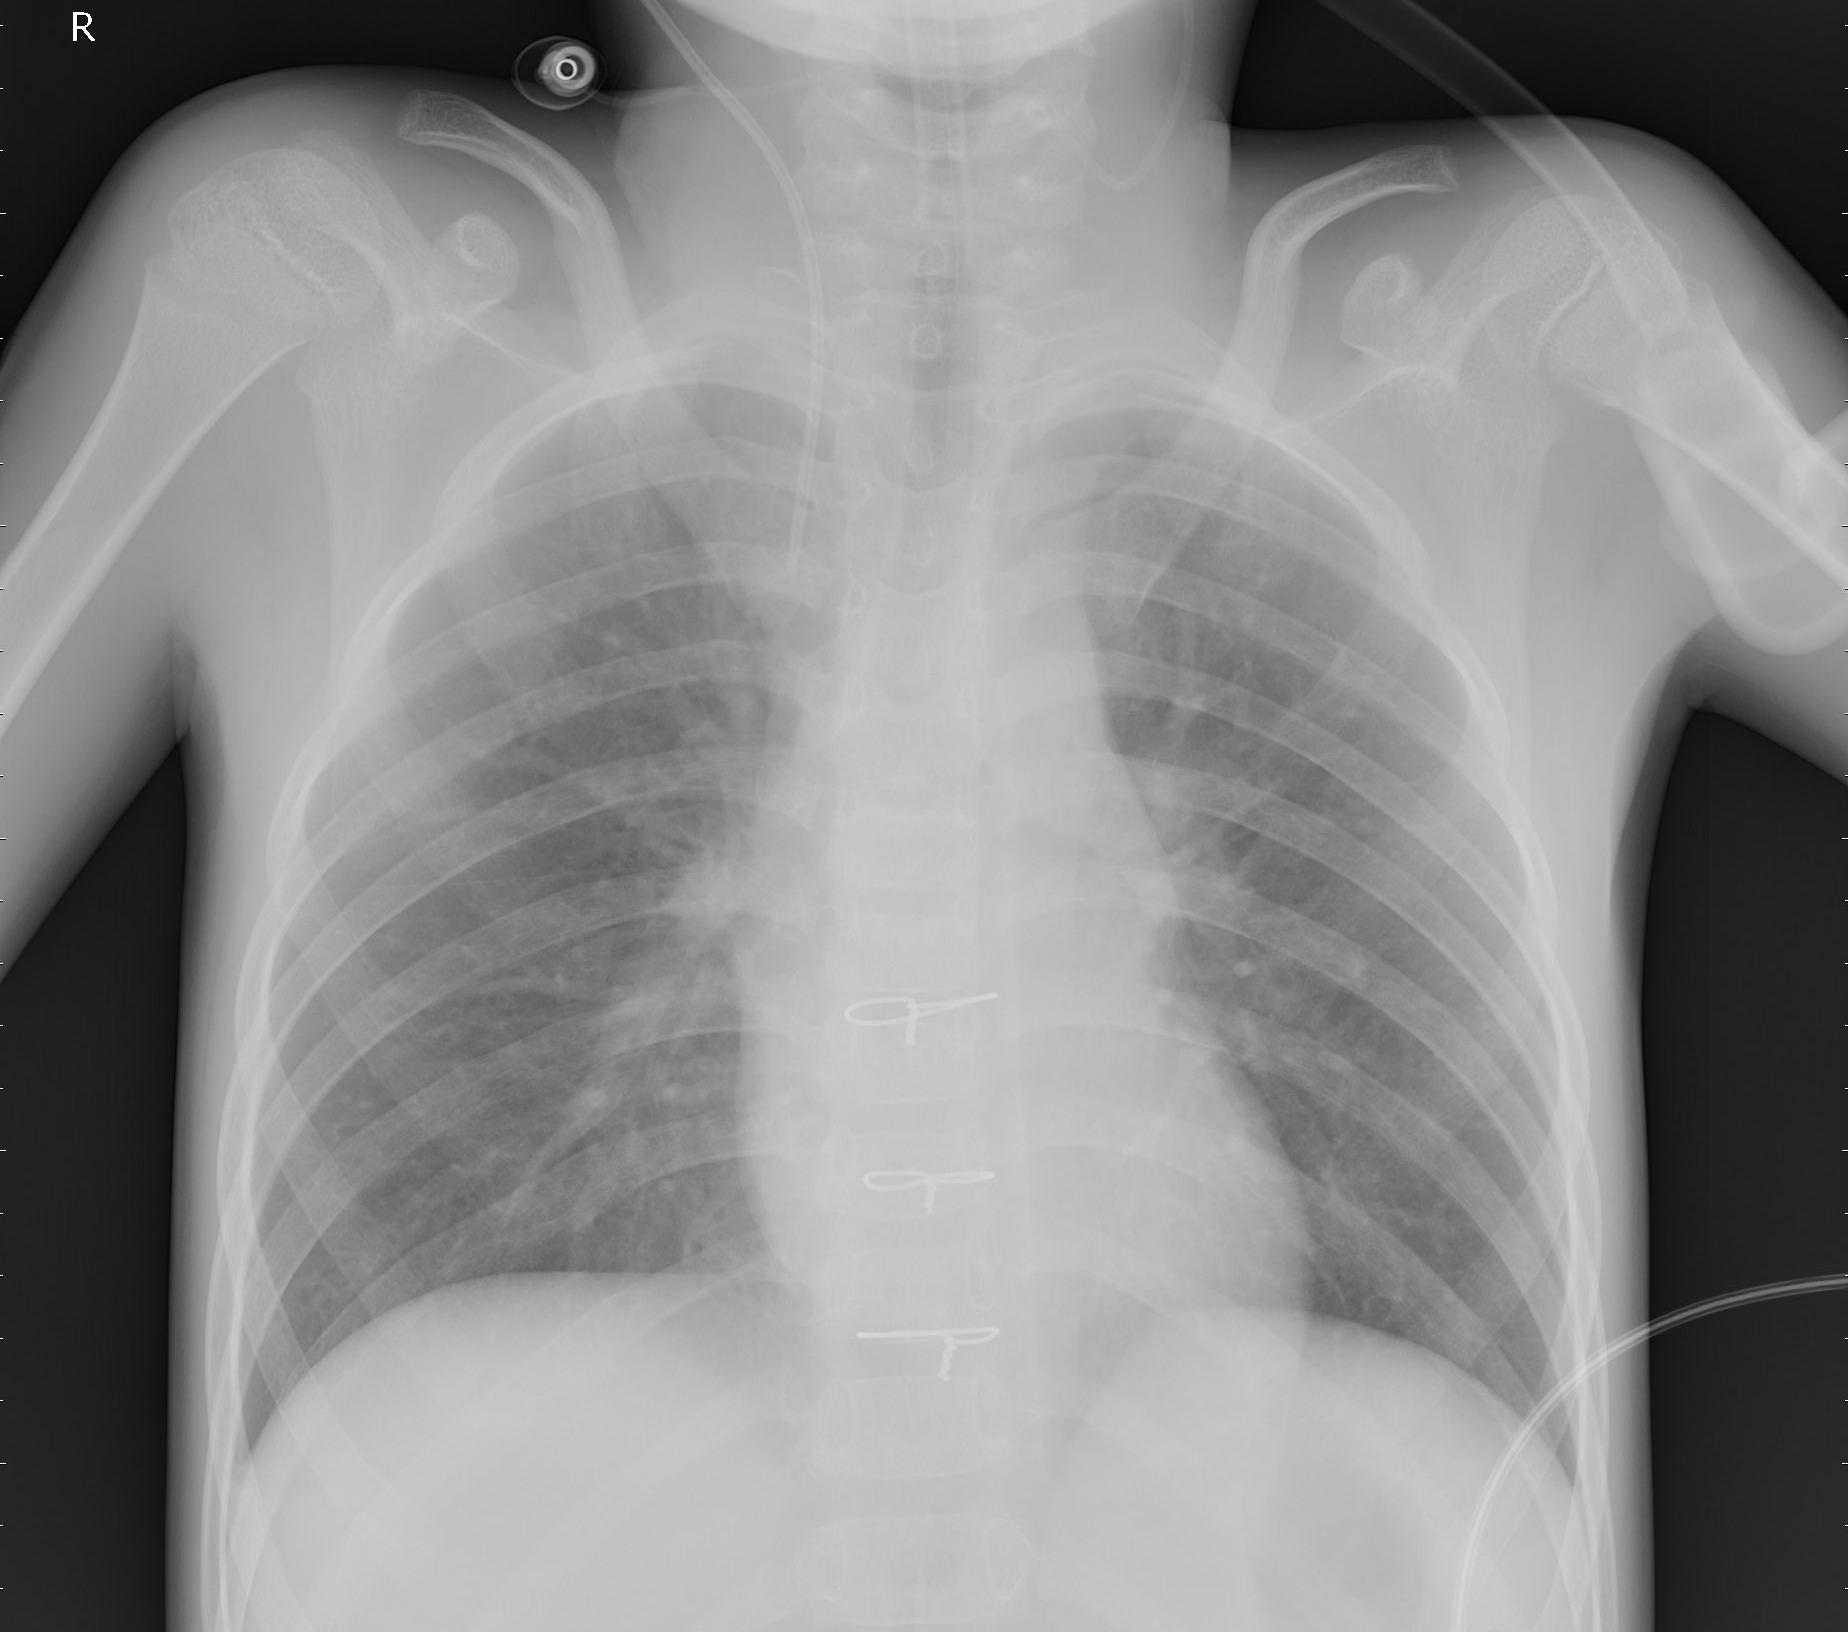

tb


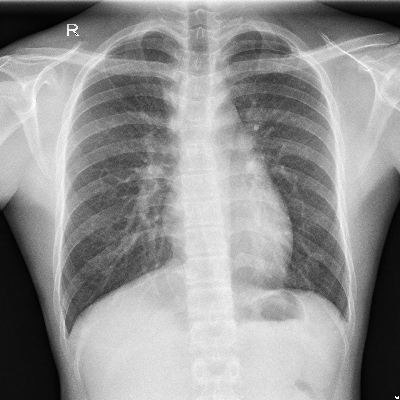

In [34]:
i=0
for path in path_list:
  print(label_list[i])
  img_list = os.listdir(path)
  display(Image(path+'/'+img_list[25], width=150, height = 150))
  i+=1
  

In [106]:

# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=16, activation='tanh', input_shape=(256,256,3,)))
model.add(Conv2D(filters=32,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=32,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=64,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation = 'softmax'))

model.compile(
              loss='categorical_crossentropy', 
              metrics= 'acc',
              optimizer='adam'
             )         


In [107]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 252, 252, 32)      4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
flatten_11 (Flatten)         (None, 230400)          

In [108]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(x_train,y_train,epochs=15,shuffle = True, callbacks = [callback], batch_size=15,validation_data=(x_val,y_val))

Epoch 1/15
50/50 [==============================] - 7s 130ms/step - loss: 4.6651 - acc: 0.4257 - val_loss: 0.9739 - val_acc: 0.5840
Epoch 2/15
50/50 [==============================] - 6s 120ms/step - loss: 0.7163 - acc: 0.6909 - val_loss: 0.4395 - val_acc: 0.7720
Epoch 3/15
50/50 [==============================] - 6s 118ms/step - loss: 0.4242 - acc: 0.7981 - val_loss: 0.4746 - val_acc: 0.8200
Epoch 4/15
50/50 [==============================] - 6s 118ms/step - loss: 0.4168 - acc: 0.8541 - val_loss: 0.9526 - val_acc: 0.6760
Epoch 5/15
50/50 [==============================] - 6s 120ms/step - loss: 0.5088 - acc: 0.7910 - val_loss: 0.4997 - val_acc: 0.8160
Epoch 6/15
50/50 [==============================] - 6s 118ms/step - loss: 0.3991 - acc: 0.8452 - val_loss: 0.4153 - val_acc: 0.8320
Epoch 7/15
50/50 [==============================] - 6s 118ms/step - loss: 0.7726 - acc: 0.7539 - val_loss: 0.4198 - val_acc: 0.7960
Epoch 8/15
50/50 [==============================] - 6s 118ms/step - loss: 0.

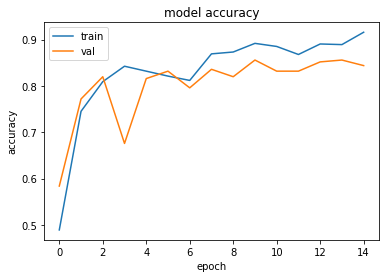

In [110]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

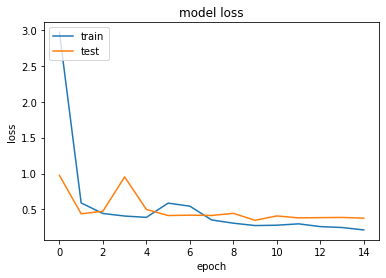

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [115]:
from sklearn.utils import shuffle

In [116]:
n_test_images, n_test_labels = shuffle(test_images, test_labels)
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels, batch_size=50)
print("test loss, test acc:", results)

Evaluate on test data
2/2 [==============================] - 0s 38ms/step - loss: 0.6510 - acc: 0.7742
test loss, test acc: [0.6510449647903442, 0.774193525314331]


In [117]:
y_pred = model.predict(n_test_images)
y_pred_classes = np.argmax(y_pred, axis = 1)

In [120]:
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)

array([[10,  7,  3],
       [ 9,  7,  6],
       [ 9,  8,  3]])

In [121]:
print(classification_report(np.argmax(test_labels, axis=1), y_pred_classes))

              precision    recall  f1-score   support

           0       0.36      0.50      0.42        20
           1       0.32      0.32      0.32        22
           2       0.25      0.15      0.19        20

    accuracy                           0.32        62
   macro avg       0.31      0.32      0.31        62
weighted avg       0.31      0.32      0.31        62

